<a href="https://colab.research.google.com/github/RushilPatel0703/DAE_Project/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 

In [2]:
url1 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/eth_illicit_features.csv'
data_1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/transaction_dataset.csv'
data_2 = pd.read_csv(url2)

In [3]:
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)
#pd.reset_option('max_columns')
pd.reset_option('max_rows')

In [4]:
data_1

,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,0x38e404b6ca4549988ced1d065330f1f722787924,0,3.0,15139.0,1.186571e+03,698.0,1.656129e+09,1.275572e+08,25,14,...,0.009248,24,4,0.866667,0.500000,0.464286,0.643490,0.615051,1.080000,0.236468
12142,0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0,0.0,411419.0,2.206761e+04,0.0,1.648939e+09,8.295712e+07,149,119,...,-1.600064,136,3,0.166667,0.850000,0.142857,0.856372,0.289923,0.932886,0.617016
12143,0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0,0.0,0.0,0.000000e+00,0.0,4.086570e+05,7.712044e+03,48,0,...,0.000000,41,296,528.000000,0.000000,0.996226,0.000000,0.000000,11.020833,0.000000
12144,0x0cd3724542af4be8243eba3f560c0c55c5abd1df,0,0.0,2003867.0,1.412816e+05,223.0,1.647548e+09,1.033063e+08,156,59,...,-0.364932,69,6,0.266667,0.776316,0.210526,0.907248,0.571522,0.480769,0.161996


In [5]:
data_2

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [6]:
# dropping columns not in common with data_2
data_1.drop(['minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx', 'lifetime', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'], inplace=True, axis=1)

In [7]:
data_1.columns


Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'sentTransactions', 'receivedTransactions', 'createdContracts',
       'numUniqSentAddress', 'numUniqRecAddress', 'minValSent', 'maxValSent',
       'avgValSent', 'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance'],
      dtype='object')

In [9]:
# dropping columns not in common with data_1
data_2.drop(['Unnamed: 0', 'Index', 'Time Diff between first and last (Mins)',
       'min value sent to contract', 'max val sent to contract', 'avg value sent to contract',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type'], inplace=True, axis=1)

In [8]:
data_2.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [10]:
# renaming columns to column names in data_1 for ease of
data_2.rename(columns= {'Address':'address', 'FLAG':'flag', 'Avg min between sent tnx':'avgTimeBetweenSentTnx',
                        'Avg min between received tnx':'avgTimeBetweenRecTnx', 'Sent tnx':'sentTransactions',
                        'Received Tnx':'receivedTransactions', 'Number of Created Contracts':'createdContracts',
                        'Unique Received From Addresses':'numUniqRecAddress', 'Unique Sent To Addresses':'numUniqSentAddress',
                        'min value received':'minValReceived','max value received ':'maxValReceived',
                        'avg val received':'avgValReceived', 'min val sent':'minValSent', 'max val sent':'maxValSent',
                        'avg val sent': 'avgValSent', 'total transactions (including tnx to create contract':'totalTransactions',
                        'total Ether sent':'totalEtherSent', 'total ether received':'totalEtherReceived',
                        'total ether sent contracts':'totalEtherSentContracts', 'total ether balance':'totalEtherBalance'}, inplace=True)

In [11]:
df = pd.concat([data_1, data_2]) # combine data_1 and data_2

In [12]:
df.columns

Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'sentTransactions', 'receivedTransactions', 'createdContracts',
       'numUniqSentAddress', 'numUniqRecAddress', 'minValSent', 'maxValSent',
       'avgValSent', 'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance'],
      dtype='object')

In [21]:
df = df.drop('address', axis=1)

In [22]:
df # final dataset to use

,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,1,5.807655e+04,7.148260e+07,66,21,0,47,17,0.000000,183.0,5.559412,0.018779,266.000000,17.486340,87,366.921190,367.213130,0.0,0.291940
1,1,0.000000e+00,7.529115e+08,0,2,0,0,2,0.000000,0.0,0.000000,0.003541,0.010000,0.006771,2,0.000000,0.013541,0.0,0.013541
2,1,1.710279e+06,6.820612e+07,15,22,0,13,21,0.000000,25.0,13.330000,0.425099,49.999314,9.100750,37,199.950000,200.216494,0.0,0.266494
3,1,1.576106e+04,1.352571e+07,109,111,0,54,104,0.000000,680.0,14.959358,0.010000,193.500000,14.689887,220,1630.570000,1630.577419,0.0,0.007419
4,1,0.000000e+00,3.751409e+08,1,4,0,1,4,1.900000,1.9,1.900000,0.002199,1.000000,0.475550,5,1.900000,1.902199,0.0,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,1.263510e+04,6.313900e+02,4,13,0,4,11,0.465461,12.2,9.166365,0.004082,12.000000,2.821060,17,36.665461,36.673777,0.0,0.008316
9837,1,0.000000e+00,0.000000e+00,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000
9838,1,2.499440e+03,2.189290e+03,67,43,0,44,31,0.004000,9.5,0.922179,0.001078,21.310000,1.234192,110,61.785995,53.070252,0.0,-8.715743
9839,1,0.000000e+00,0.000000e+00,0,1,0,0,1,0.000000,0.0,0.000000,0.500000,0.500000,0.500000,1,0.000000,0.500000,0.0,0.500000


In [14]:
df.isnull().sum() # check for msiing vals

address                    0
flag                       0
avgTimeBetweenSentTnx      0
avgTimeBetweenRecTnx       0
sentTransactions           0
receivedTransactions       0
createdContracts           0
numUniqSentAddress         0
numUniqRecAddress          0
minValSent                 0
maxValSent                 0
avgValSent                 0
minValReceived             0
maxValReceived             0
avgValReceived             0
totalTransactions          0
totalEtherSent             0
totalEtherReceived         0
totalEtherSentContracts    0
totalEtherBalance          0
dtype: int64

In [15]:
df.duplicated().sum()

125

In [16]:
df.drop_duplicates(inplace=True) #removing null values
df.duplicated().sum()

0

In [17]:
df.skew(axis = 0, skipna = True).sort_values() # check skewness of all data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


totalEtherBalance           -3.218564
flag                         0.719930
avgTimeBetweenRecTnx         2.620069
totalTransactions            3.425968
receivedTransactions         4.673886
sentTransactions             5.568895
numUniqRecAddress            6.753592
numUniqSentAddress          12.528606
avgTimeBetweenSentTnx       21.763417
minValReceived              43.451106
avgValSent                  53.459817
maxValReceived              58.327570
createdContracts            63.004272
maxValSent                  73.548959
totalEtherReceived          83.881310
totalEtherSent              84.067256
avgValReceived              97.952199
minValSent                  98.741249
totalEtherSentContracts    147.452227
dtype: float64

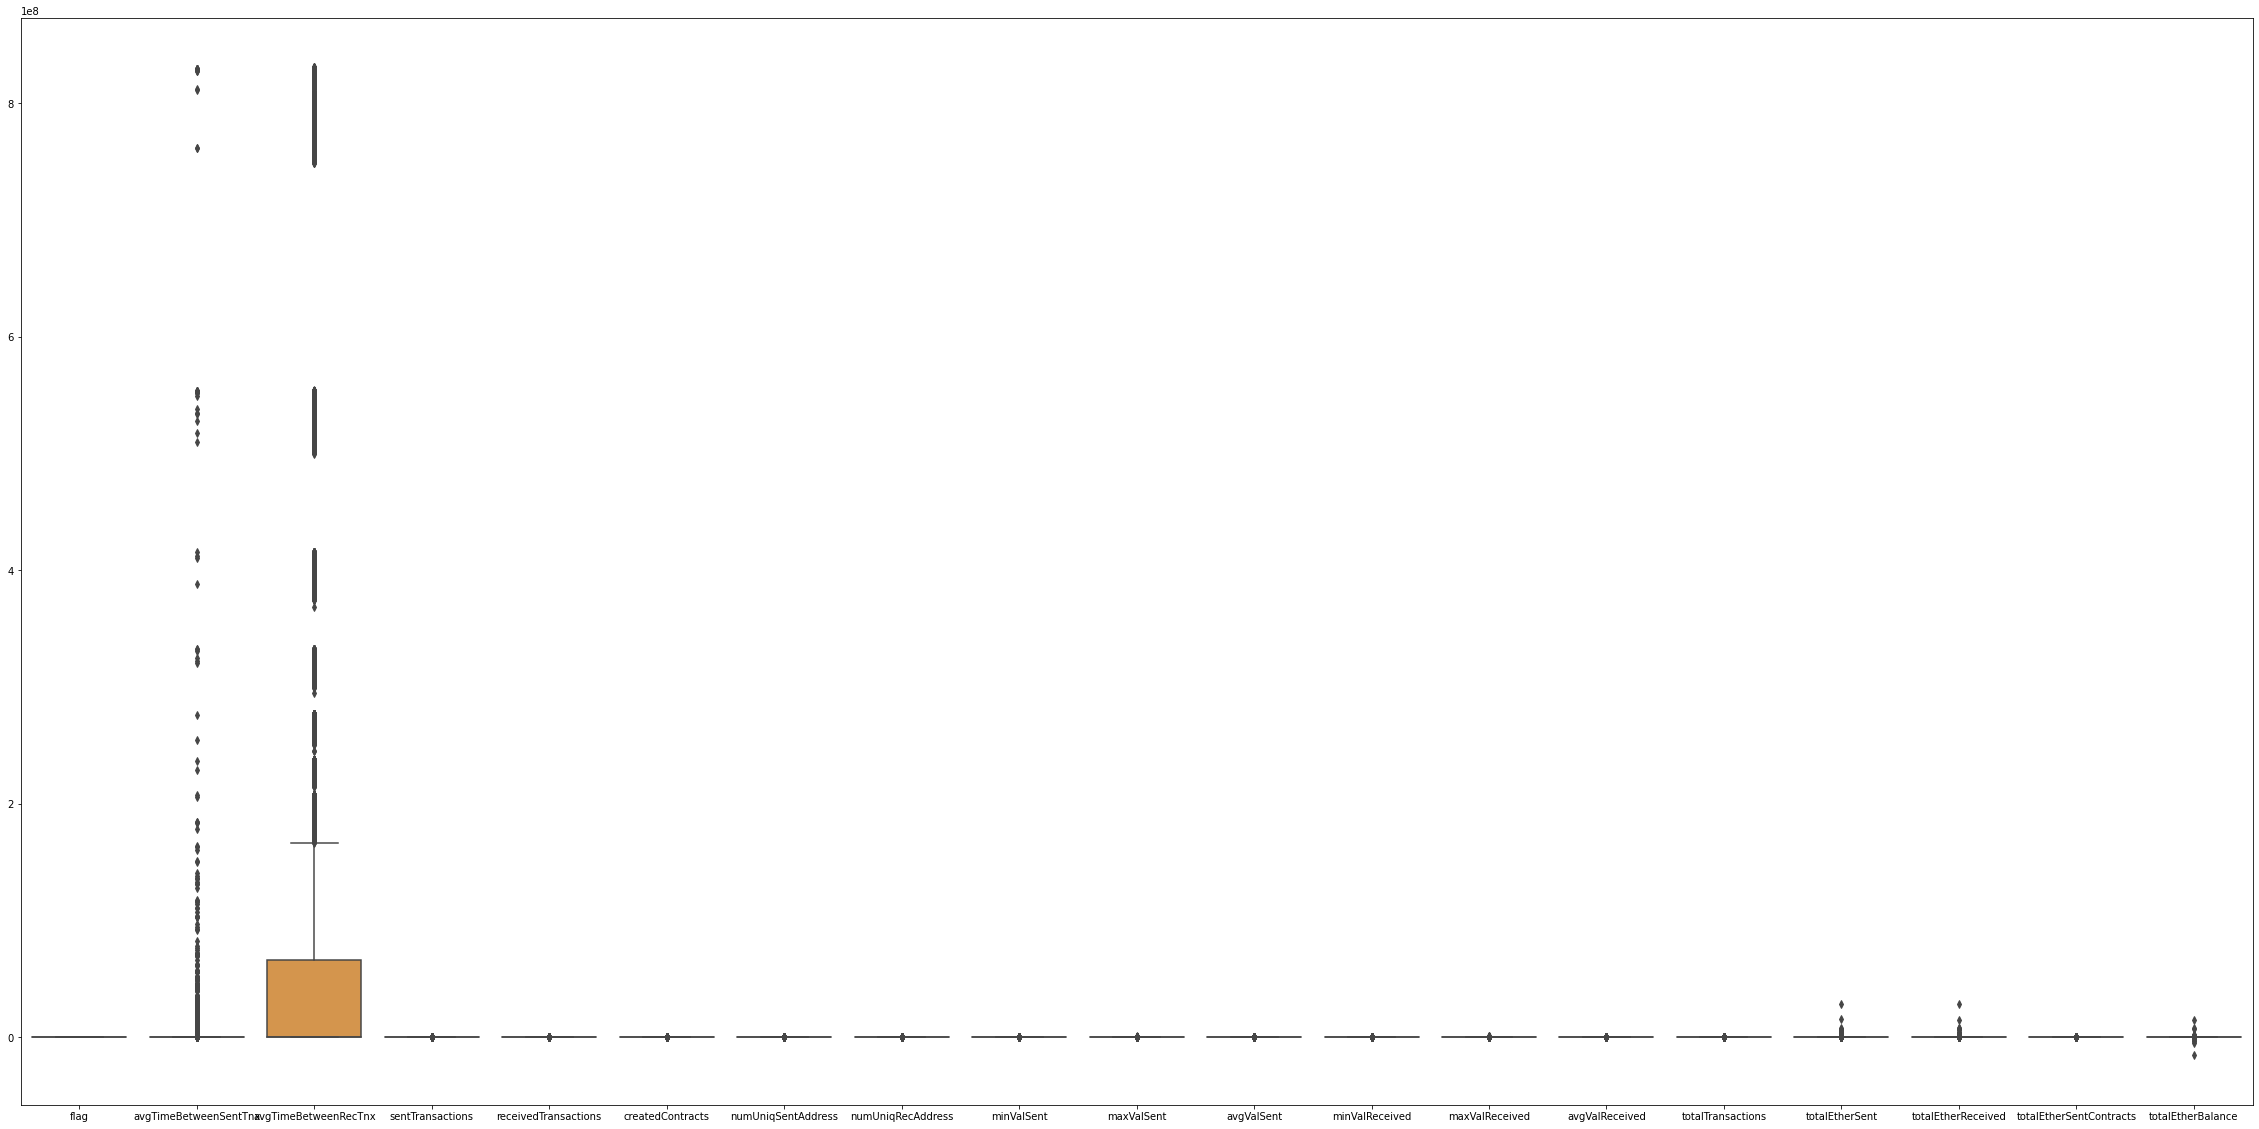

In [18]:
plt.figure(figsize=(40, 20))
sns.boxplot(data=df)

In [32]:
X = df.drop('flag',axis=1)
y = df['flag']

In [33]:
df2 = X.copy()
from scipy import stats

# data transformation to handle the outliers called box cox
# makes a better distribution of the data so that outliers have minimal impact on our ml model

for col in df2:
  if df2[col].dtypes == 'int64' or df2[col].dtypes == 'float64':
    posdata = df2[col][df2[col] > 0]
    col_data, fitted_lambda = stats.boxcox(posdata)
    df2.loc[df2[col] > 0, col] = col_data
df_final = df2.copy()

In [34]:
df_final.skew(axis = 0, skipna = True).sort_values()

totalEtherBalance         -113.841353
totalEtherSentContracts    -32.452553
minValSent                  -0.714737
minValReceived              -0.492611
avgValReceived               0.023142
avgValSent                   0.029651
maxValReceived               0.074183
totalTransactions            0.094538
totalEtherReceived           0.159352
avgTimeBetweenRecTnx         0.171635
receivedTransactions         0.191791
numUniqRecAddress            0.261355
maxValSent                   0.318413
avgTimeBetweenSentTnx        0.337046
sentTransactions             0.466997
totalEtherSent               0.499708
numUniqSentAddress           0.560156
createdContracts             9.983197
dtype: float64

In [35]:
df_final

,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,11.959620,28.761226,2.738908,2.267899,0.0,2.042159,1.780640,0.000000,5.430141,1.756620,-4.247200,5.550745,2.952849,3.061981,6.709048,6.248900,0.0,-1.276116
1,0.000000,34.685312,0.000000,0.646376,0.0,0.000000,0.613874,0.000000,0.000000,0.000000,-6.202372,-4.627610,-4.731940,0.651392,0.000000,-4.131426,0.0,-4.884693
2,16.078006,28.649826,2.041197,2.292780,0.0,1.650408,1.854484,0.000000,3.302229,2.684527,-0.867608,3.895913,2.262553,2.650212,5.939432,5.574456,0.0,-1.374303
3,10.428648,24.957559,2.928184,3.026561,0.0,2.074293,2.264271,0.000000,6.870391,2.808560,-4.973091,5.236146,2.767688,3.442217,8.686109,7.939827,0.0,-5.669994
4,0.000000,32.862420,0.000000,1.207530,0.0,0.000000,1.092904,0.653676,0.645123,0.647555,-6.780711,0.000000,-0.737275,1.396035,0.650656,0.646942,0.0,-7.342807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,10.172210,7.553957,1.195131,1.997150,0.0,1.082171,1.609725,-0.748385,2.551582,2.284457,-6.031526,2.478406,1.048964,2.216041,3.891029,3.727767,0.0,-5.518939
9837,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9838,8.319153,9.298443,2.744889,2.626211,0.0,2.026298,1.976785,-4.740745,2.291856,-0.080926,-7.663281,3.049327,0.210901,3.164240,4.505619,4.124799,0.0,-8.715743
9839,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.701127,-0.693654,-0.687920,0.000000,0.000000,-0.688617,0.0,-0.707233


In [36]:
df_final.var() #checking variance of each feature

avgTimeBetweenSentTnx      3.290210e+01
avgTimeBetweenRecTnx       1.608559e+02
sentTransactions           1.587007e+00
receivedTransactions       1.513378e+00
createdContracts           1.751963e-04
numUniqSentAddress         6.417110e-01
numUniqRecAddress          6.089201e-01
minValSent                 3.917470e+00
maxValSent                 7.157667e+00
avgValSent                 6.897478e+00
minValReceived             1.254465e+01
maxValReceived             7.879897e+00
avgValReceived             8.098161e+00
totalTransactions          1.439545e+00
totalEtherSent             1.203163e+01
totalEtherReceived         1.105944e+01
totalEtherSentContracts    1.723726e-02
totalEtherBalance          1.381218e+10
dtype: float64

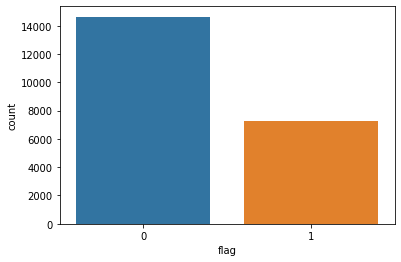

In [37]:
sns.countplot(x="flag", data=df) #We notice a bias in our dataset where there are more samples with no fraud the frauds

In [39]:
X_t = df_final.copy()
X_t

,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,11.959620,28.761226,2.738908,2.267899,0.0,2.042159,1.780640,0.000000,5.430141,1.756620,-4.247200,5.550745,2.952849,3.061981,6.709048,6.248900,0.0,-1.276116
1,0.000000,34.685312,0.000000,0.646376,0.0,0.000000,0.613874,0.000000,0.000000,0.000000,-6.202372,-4.627610,-4.731940,0.651392,0.000000,-4.131426,0.0,-4.884693
2,16.078006,28.649826,2.041197,2.292780,0.0,1.650408,1.854484,0.000000,3.302229,2.684527,-0.867608,3.895913,2.262553,2.650212,5.939432,5.574456,0.0,-1.374303
3,10.428648,24.957559,2.928184,3.026561,0.0,2.074293,2.264271,0.000000,6.870391,2.808560,-4.973091,5.236146,2.767688,3.442217,8.686109,7.939827,0.0,-5.669994
4,0.000000,32.862420,0.000000,1.207530,0.0,0.000000,1.092904,0.653676,0.645123,0.647555,-6.780711,0.000000,-0.737275,1.396035,0.650656,0.646942,0.0,-7.342807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,10.172210,7.553957,1.195131,1.997150,0.0,1.082171,1.609725,-0.748385,2.551582,2.284457,-6.031526,2.478406,1.048964,2.216041,3.891029,3.727767,0.0,-5.518939
9837,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9838,8.319153,9.298443,2.744889,2.626211,0.0,2.026298,1.976785,-4.740745,2.291856,-0.080926,-7.663281,3.049327,0.210901,3.164240,4.505619,4.124799,0.0,-8.715743
9839,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.701127,-0.693654,-0.687920,0.000000,0.000000,-0.688617,0.0,-0.707233


### LR Model with skew adjusted data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y,train_size=0.8, random_state=1)

In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
clf.score(X_train, y_train)

0.7705414832180227

In [29]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2930
           1       0.69      0.54      0.61      1443

    accuracy                           0.77      4373
   macro avg       0.74      0.71      0.72      4373
weighted avg       0.76      0.77      0.76      4373



### LR Model with no adjustment to data

In [40]:
df

,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,1,5.807655e+04,7.148260e+07,66,21,0,47,17,0.000000,183.0,5.559412,0.018779,266.000000,17.486340,87,366.921190,367.213130,0.0,0.291940
1,1,0.000000e+00,7.529115e+08,0,2,0,0,2,0.000000,0.0,0.000000,0.003541,0.010000,0.006771,2,0.000000,0.013541,0.0,0.013541
2,1,1.710279e+06,6.820612e+07,15,22,0,13,21,0.000000,25.0,13.330000,0.425099,49.999314,9.100750,37,199.950000,200.216494,0.0,0.266494
3,1,1.576106e+04,1.352571e+07,109,111,0,54,104,0.000000,680.0,14.959358,0.010000,193.500000,14.689887,220,1630.570000,1630.577419,0.0,0.007419
4,1,0.000000e+00,3.751409e+08,1,4,0,1,4,1.900000,1.9,1.900000,0.002199,1.000000,0.475550,5,1.900000,1.902199,0.0,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,1.263510e+04,6.313900e+02,4,13,0,4,11,0.465461,12.2,9.166365,0.004082,12.000000,2.821060,17,36.665461,36.673777,0.0,0.008316
9837,1,0.000000e+00,0.000000e+00,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000
9838,1,2.499440e+03,2.189290e+03,67,43,0,44,31,0.004000,9.5,0.922179,0.001078,21.310000,1.234192,110,61.785995,53.070252,0.0,-8.715743
9839,1,0.000000e+00,0.000000e+00,0,1,0,0,1,0.000000,0.0,0.000000,0.500000,0.500000,0.500000,1,0.000000,0.500000,0.0,0.500000


In [41]:
X_wt = df.drop(['flag'],axis=1)
y_wt = df['flag']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_wt, y_wt,train_size=0.8, random_state=1)

In [43]:
clf2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)

In [44]:
clf2.score(X_train2, y_train2)

0.6741380296186175

In [45]:
pred = clf2.predict(X_test2)
print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      2930
           1       0.49      0.31      0.38      1443

    accuracy                           0.67      4373
   macro avg       0.60      0.58      0.58      4373
weighted avg       0.64      0.67      0.64      4373



### LR Model with data standardization

In [27]:
# we standardize the data with StandardScaler we basically just does z = (x-mean)/standard deviation
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(df)

df_standard = pd.DataFrame(standardized_data, columns=df.columns)

In [29]:
df_standard 


,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,1.422747,-0.064062,-0.091703,-0.182366,-0.236993,-0.021543,-0.040105,-0.173677,-0.027240,-0.008049,-0.077674,-0.063584,-0.010944,-0.020411,-0.292691,-0.023613,-0.026170,-0.007778,-0.003466
1,1.422747,-0.065950,3.476152,-0.226360,-0.247475,-0.021543,-0.134434,-0.190902,-0.027240,-0.036944,-0.098017,-0.063619,-0.035903,-0.026710,-0.327941,-0.025080,-0.027649,-0.007778,-0.003467
2,1.422747,-0.010369,-0.108858,-0.216362,-0.236441,-0.021543,-0.108343,-0.169083,-0.027240,-0.032996,-0.049240,-0.062637,-0.031212,-0.023433,-0.313427,-0.024281,-0.026843,-0.007778,-0.003466
3,1.422747,-0.065438,-0.395156,-0.153703,-0.187337,-0.021543,-0.026056,-0.073768,-0.027240,0.070423,-0.043277,-0.063604,-0.017747,-0.021419,-0.237536,-0.018562,-0.021080,-0.007778,-0.003467
4,1.422747,-0.065950,1.498204,-0.225694,-0.246372,-0.021543,-0.132427,-0.188606,-0.018051,-0.036644,-0.091064,-0.063622,-0.035810,-0.026541,-0.326697,-0.025073,-0.027642,-0.007778,-0.003467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21857,1.422747,-0.065539,-0.465971,-0.223694,-0.241406,-0.021543,-0.126406,-0.180567,-0.024989,-0.035017,-0.064475,-0.063618,-0.034778,-0.025696,-0.321721,-0.024934,-0.027502,-0.007778,-0.003467
21858,1.422747,-0.065950,-0.465974,-0.226360,-0.248579,-0.021543,-0.134434,-0.193199,-0.027240,-0.036944,-0.098017,-0.063628,-0.035904,-0.026712,-0.328771,-0.025080,-0.027649,-0.007778,-0.003467
21859,1.422747,-0.065869,-0.465963,-0.181700,-0.224854,-0.021543,-0.046126,-0.157599,-0.027220,-0.035444,-0.094642,-0.063625,-0.033905,-0.026267,-0.283153,-0.024833,-0.027436,-0.007778,-0.003519
21860,1.422747,-0.065950,-0.465974,-0.226360,-0.248027,-0.021543,-0.134434,-0.192051,-0.027240,-0.036944,-0.098017,-0.062462,-0.035857,-0.026532,-0.328356,-0.025080,-0.027647,-0.007778,-0.003464


In [46]:
X_stand = df_standard.drop(['flag'],axis=1)
y_stand = df['flag']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_stand, y_stand,train_size=0.8, random_state=1)

In [50]:
clf3 = LogisticRegression(random_state=0).fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [51]:
clf3.score(X_train3, y_train3)

0.6808279489965121

In [53]:
pred3 = clf3.predict(X_test3)
print(classification_report(y_test3, pred3))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      2930
           1       0.56      0.14      0.23      1443

    accuracy                           0.68      4373
   macro avg       0.63      0.54      0.51      4373
weighted avg       0.65      0.68      0.61      4373



### LR Model with Imbalance correction with Feature Engineering

In [85]:
# we will use SMOTE to artificially generate data points to fix the imbalance noticed earlier
# this will only be applied to the training data

X_new = df.drop(['flag'],axis=1)
y_new = df['flag']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new, y_new,train_size=0.8, random_state=1)

smote = SMOTE(random_state=42, k_neighbors=2)
X_train4_new, y_train4_new = smote.fit_resample(X_train4,y_train4)

In [86]:
clf4 = LogisticRegression(random_state=0).fit(X_train4_new, y_train4_new)

In [87]:
clf4.score(X_train4_new, y_train4_new)

0.6321883277792019

In [88]:
pred4 = clf4.predict(X_test4)
print(classification_report(y_test4, pred4))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79      2930
           1       0.55      0.42      0.48      1443

    accuracy                           0.70      4373
   macro avg       0.65      0.63      0.63      4373
weighted avg       0.68      0.70      0.68      4373



### LR Model with all of the above transformations and manipulations